In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

In [17]:
def load_df(fracPos, p):
    path = f"../simulations/test_q_voter_new/test_q_voter_new_NAGENTS=500000_NSTEPS=50000000_FRAC_LINKS=0.0_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=8_EPIDEMIC=beta=0.50_gamma=0.30_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=10.0_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")
    
fracPositive = [f'0.{x}{x}' for x in range(0, 9)]
fracPositive.append('1.00')
p = ['0.03', '0.06', '0.10']


p1 = [load_df(fP, p[0]) for fP in fracPositive]
p2 = [load_df(fP, p[1]) for fP in fracPositive]
p3 = [load_df(fP, p[2]) for fP in fracPositive]

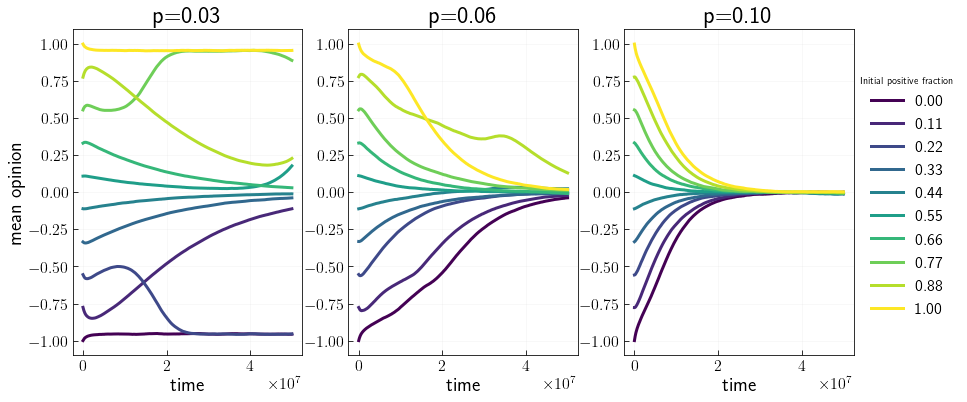

In [32]:
colormap = plt.cm.get_cmap('viridis', len(fracPositive))

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.xlabel("time")
plt.ylabel("mean opinion")
for i, df in enumerate(p1):
    plt.plot(df.step, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[0]}')

plt.subplot(1, 3, 2)
for i, df in enumerate(p2):
    plt.plot(df.step, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[1]}')
plt.xlabel("time")

plt.subplot(1, 3, 3)
for i, df in enumerate(p3):
    plt.plot(df.step, df.meanOpinion, label=fracPositive[i], color=colormap(i))
plt.title(f'p={p[2]}')

plt.xlabel("time")
plt.legend(loc=(1, 0.1), title="Initial positive fraction")